Command  to download dependency
!pip install mysql-connector-python

In [1]:
! pip install mysql-connector-python

In [2]:
#Importing Modules

In [16]:
import mysql.connector

###  Step 1: Connect to the database

In [17]:
conn=mysql.connector.connect(host='localhost',user='root',password='root@123',database='ecom_db')

### Step 2: Creating curser Object

In [18]:
mycur=conn.cursor()

### Step 3:Executing simple query

In [6]:
mycur.execute('select * from customers;')

#### `Importing Libraries`

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### 1 .Count of Customer by Gender

In [16]:
query1=('select gender,count(*) as total from customers group by gender;')

In [17]:
df = pd.read_sql(query1, conn)

C:\Users\NIKITA\AppData\Local\Temp\ipykernel_16224\1266032527.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query1, conn)


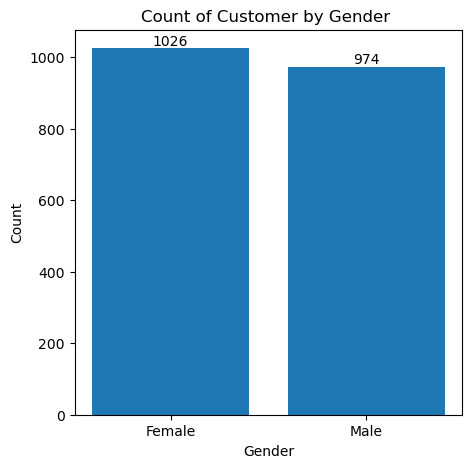

In [18]:
plt.figure(figsize=(5,5))
bars=plt.bar(df['gender'], df['total'])
plt.title("Count of Customer by Gender ")
plt.xlabel("Gender")
plt.ylabel("Count")
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        str(height),
        ha='center',
        va='bottom'
    )
plt.show()

#### 2.Top 10 cities with most customer.

In [9]:
query2=('select city,count(*) as customer_count from customers group by city order by customer_count desc limit 10 ;')

In [10]:
df = pd.read_sql(query2, conn)

C:\Users\NIKITA\AppData\Local\Temp\ipykernel_2184\295868402.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query2, conn)


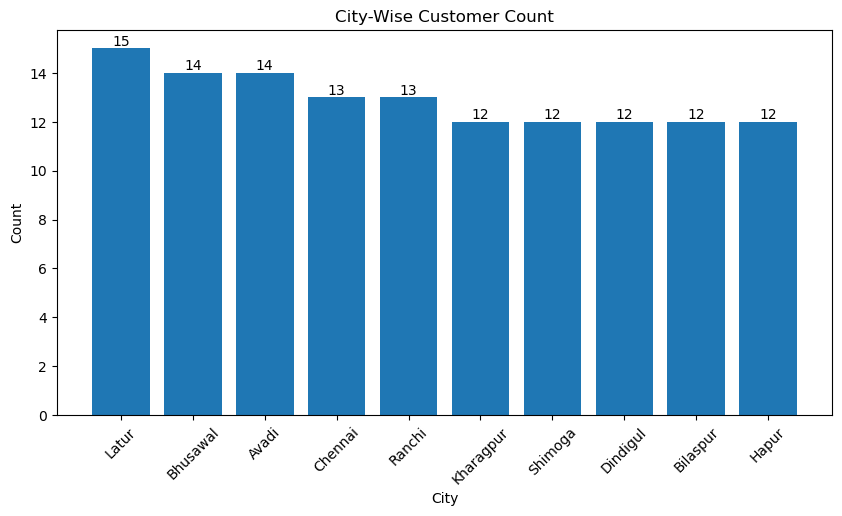

In [11]:
plt.figure(figsize=(10,5))
bars=plt.bar(df['city'], df['customer_count'])
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("City-Wise Customer Count")
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        str(height),
        ha='center',
        va='bottom'
    )
plt.show()

#### 3.Top 10 State wise most customers.


In [21]:
query3=("select state,count(*) as customer_count from customers group by state order by customer_count desc limit 10 ;")

In [22]:
df=pd.read_sql(query3,conn)

C:\Users\NIKITA\AppData\Local\Temp\ipykernel_2184\2740128880.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query3,conn)


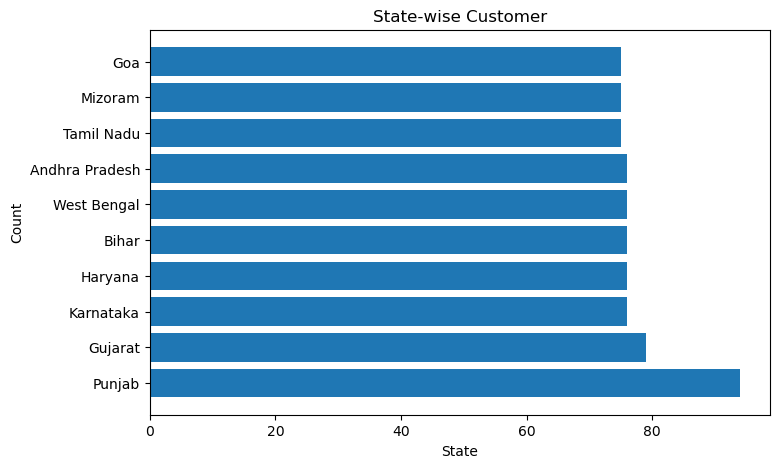

In [31]:
plt.figure(figsize=(8,5))
bars=plt.barh(df['state'], df['customer_count'])
plt.xlabel("State")
plt.ylabel("Count")
plt.title("State-wise Customer")
plt.show()

##### 👉 From the above graph, it is evident that a few states dominate the customer base, showing a strong geographic concentration of customers

#### 4.Montly Sale Trend Over Time

In [20]:
query4=("SELECT  monthname(order_date) AS month,COUNT(order_id) AS Total_order FROM orders GROUP BY month ORDER BY month desc; ")

In [26]:
data=pd.read_sql(query4,conn)

C:\Users\NIKITA\AppData\Local\Temp\ipykernel_16224\3129852130.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data=pd.read_sql(query4,conn)


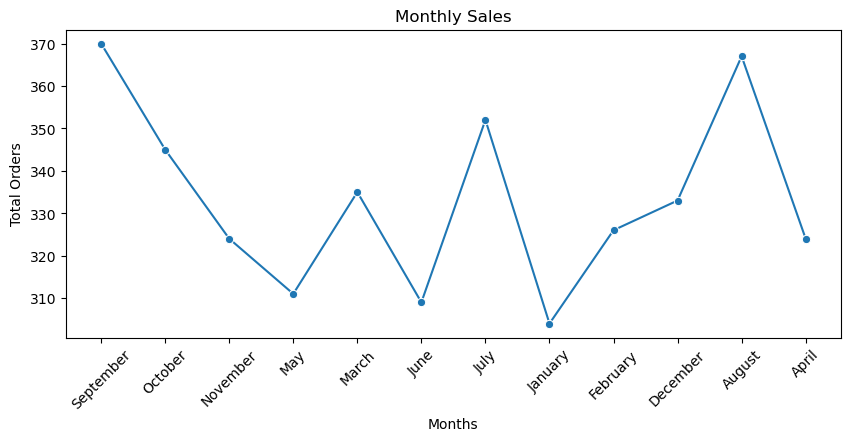

In [28]:
plt.figure(figsize=(10,4))
sns.lineplot(x='month', y='Total_order', data=data,marker="o")
plt.xlabel("Months")
plt.ylabel("Total Orders")
plt.title("Monthly Sales")
plt.xticks(rotation=45)
plt.show()



##### 👉 It highlights monthly order distribution to analyze seasonal patterns in customer demand.



#### 5.Sentiment Distrubution.


In [30]:
query5=("select sentiment ,count(*) As count from reviews  group by sentiment;")

In [31]:
data=pd.read_sql(query5,conn)

C:\Users\NIKITA\AppData\Local\Temp\ipykernel_16224\2969090749.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data=pd.read_sql(query5,conn)


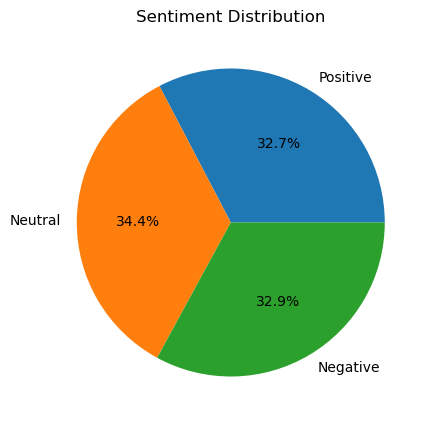

In [32]:

plt.figure(figsize=(10,5))
plt.pie(
    data['count'],
    labels=data['sentiment'],
    autopct='%1.1f%%'
)
plt.title("Sentiment Distribution")
plt.show()


#### 6. least selling product (dead)


In [26]:
query6=("select p.product_id,p.name as product_name,p.brand,coalesce(sum(oi.quantity),0) as quantity_sold from products as p  left join order_items oi on p.product_id=oi.product_id group by product_id order by quantity_sold limit 5;")

In [27]:
data=pd.read_sql(query6,conn)

C:\Users\NIKITA\AppData\Local\Temp\ipykernel_2184\3418536197.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data=pd.read_sql(query6,conn)


C:\Users\NIKITA\AppData\Local\Temp\ipykernel_2184\282187745.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['product_name'],y=data['quantity_sold'],palette='mako')


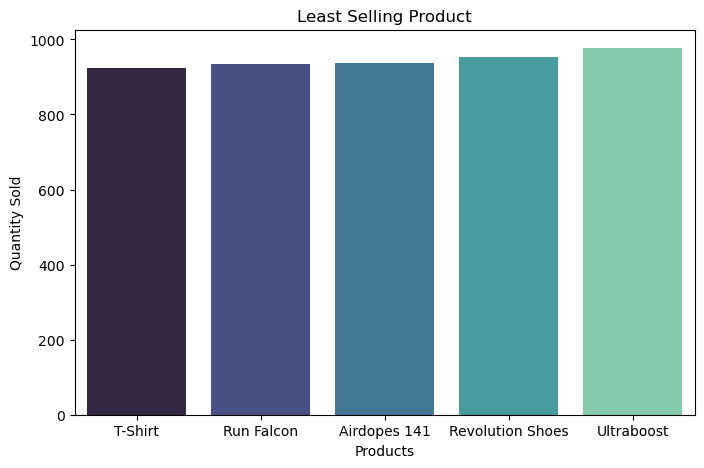

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x=data['product_name'],y=data['quantity_sold'],palette='mako')
plt.xlabel("Products")
plt.ylabel("Quantity Sold")
plt.title("Least Selling Product")
plt.show()

####  7.Top 10 best selling product (Quantity wise)


In [42]:
query7=("select p.product_id,p.name as product_name, sum(oi.quantity) as total_quantity_sold from products p join order_items oi on p.product_id=oi.product_id group by product_id order by total_quantity_sold desc limit 10 ; ")

In [43]:
data=pd.read_sql(query7,conn)

C:\Users\NIKITA\AppData\Local\Temp\ipykernel_16224\1896168852.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data=pd.read_sql(query7,conn)


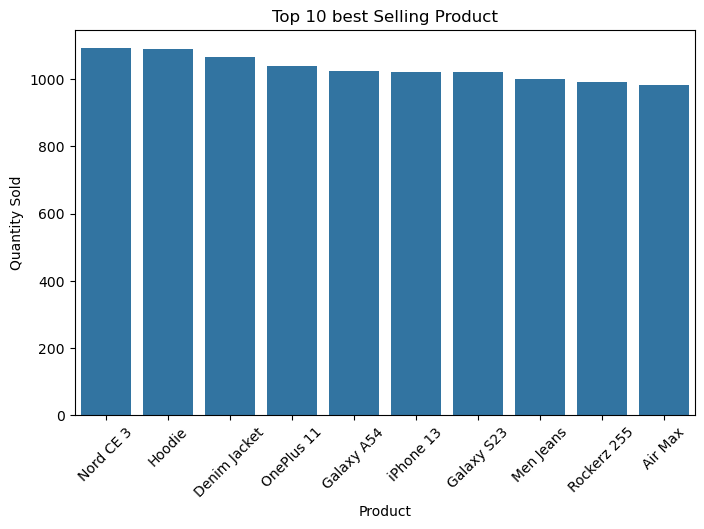

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(x=data['product_name'],y=data['total_quantity_sold'])
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.title("Top 10 best Selling Product")
plt.xticks(rotation=45)
plt.show()

##### 👉 From the above graph, it is clear that a few products have significantly higher sales quantities, indicating the top best-selling products       driving overall sales performance.

#### 8. revenue Generated by catagory


In [45]:
query8=("select c.name as categary,sum((oi.price-oi.discount)*oi.quantity) as total_revenue from categories as c join products p on c.category_id=p.category_id join order_items oi on p.product_id=oi.product_id group by c.category_id order by total_revenue desc ;")

In [46]:
data=pd.read_sql(query8,conn)

C:\Users\NIKITA\AppData\Local\Temp\ipykernel_16224\147267443.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data=pd.read_sql(query8,conn)


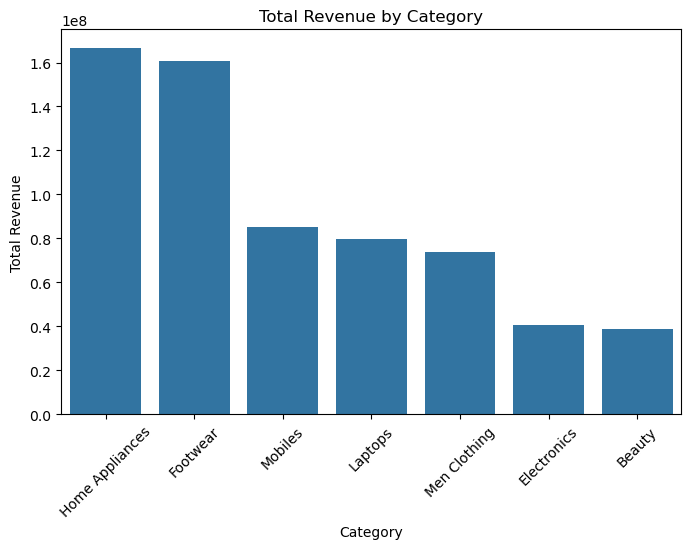

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(x=data['categary'],y=data['total_revenue'])
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Category")
plt.xticks(rotation=45)
plt.show()

##### 👉 From the above graph, it is evident that certain product categories generate higher total revenue, indicating key revenue-driving categories for the business.